# Fashion MNIST using TF.Keras

#### Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. 

Fashion-MNIST can serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

[Fashion MNIST Github Link](https://github.com/zalandoresearch/fashion-mnist)

![alt text](https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/fashion-mnist-sprite.png)




Notebook by: **Kshitiz Rimal **

## Import Packages

In [0]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

## Load Dataset

Print the shape of loaded dataset

In [2]:
# Load the fashion-mnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

4423680/4422102 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28) y_train shape: (60000,)


### Examine the number of training examples and their shape

In [5]:
# Print training set shape - note there are 60,000 training data of image size of 28x28, 60,000 train labels)
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)


Printing Number of training data and Test data

In [6]:
# Print the number of training and test datasets
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

60000 train set
10000 test set


### Print an example to understand what kind of data we have

y = 2 Pullover


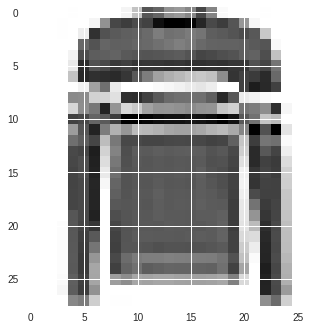

In [7]:
# Image index, you can pick any number between 0 and 59,999
img_index = 5
# y_train contains the lables, ranging from 0 to 9
label_index = y_train[img_index]
# Print the label, for example 2 Pullover
print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))
# # Show one of the images from the training dataset
plt.imshow(x_train[img_index])

## Normalizing the dataset

In [8]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

print("Number of train data - " + str(len(x_train)))
print("Number of test data - " + str(len(x_test)))

Number of train data - 60000
Number of test data - 10000


### Reshaping the dataset to fit the model

In [9]:
# Further break training data into train / validation sets (# put 5000 into validation set and keep remaining 55,000 for train)
(x_train, x_valid) = x_train[5000:], x_train[:5000] 
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# Reshape input data from (28, 28) to (28*28)
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w*h)
x_valid = x_valid.reshape(x_valid.shape[0], w*h)
x_test = x_test.reshape(x_test.shape[0], w*h)

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Print training set shape
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training, validation, and test datasets
print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

x_train shape: (55000, 784) y_train shape: (55000, 10)
55000 train set
5000 validation set
10000 test set


## Create the model

In [10]:
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Dense(256, activation='relu', input_shape=(784,)))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Take a look at the model summary
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


### Compile the model

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

### Begin the training process

In [12]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])

Train on 55000 samples, validate on 5000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
54912/55000 [============================>.] - ETA: 0s - loss: 0.5084 - acc: 0.8229
Epoch 00001: val_loss improved from inf to 0.39106, saving model to model.weights.best.hdf5
55000/55000 [==============================] - 5s 84us/sample - loss: 0.5082 - acc: 0.8229 - val_loss: 0.3911 - val_acc: 0.8610
Epoch 2/10
54656/55000 [============================>.] - ETA: 0s - loss: 0.3755 - acc: 0.8636
Epoch 00002: val_loss improved from 0.39106 to 0.36797, saving model to model.weights.best.hdf5
55000/55000 [==============================] - 4s 76us/sample - loss: 0.3753 - acc: 0.8637 - val_loss: 0.3680 - val_acc: 0.8718
Epoch 3/10
54912/55000 [============================>.] - ETA: 0s - loss: 0.3367 - acc: 0.8775
Epoch 00003: val_loss improved from 0.36797 to 0.33464, saving model to model.weights.best.hdf5
55000/55000 [==============================] - 4s 76us/sample - loss: 0.3369 -

### Load the best saved model

In [0]:
# Load the weights with the best validation accuracy
model.load_weights('model.weights.best.hdf5')

### Print the test accuracy

In [16]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.8773


### Print some test data and examine the result

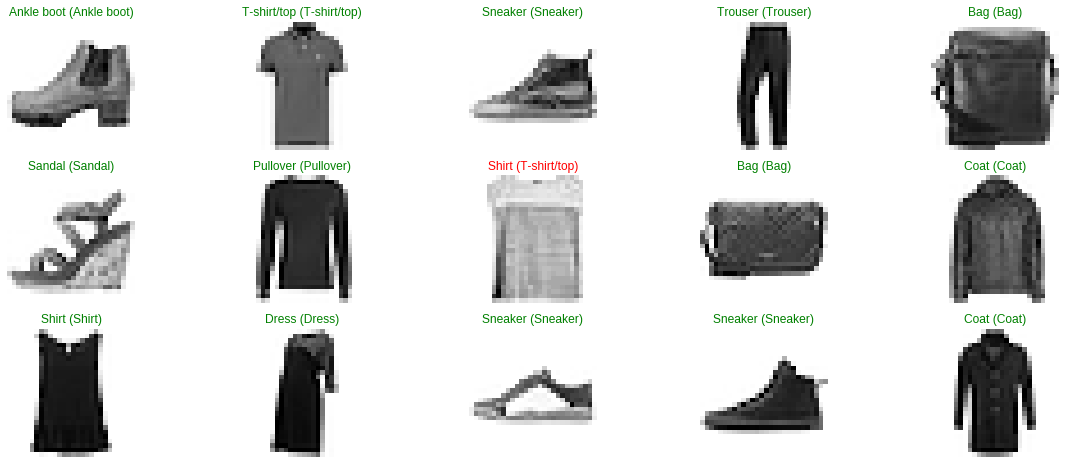

In [0]:
y_hat = model.predict(x_test)

x_test = x_test.reshape(x_test.shape[0], w,h,1)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

### Fashion MNIST using Convolution Layers

**[Colab Link](https://colab.research.google.com/drive/1z8EPJ1b2MXBa1Uh8NoRE4Xkb4sSxV-s4)**